In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
oplympic_data="dataset_olympics.csv"

olympic_data_df= pd.read_csv(oplympic_data)
olympic_data_df.fillna(0,inplace=True)
olympic_data_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [4]:
#findings
number_of_Teams=len(olympic_data_df["Team"].unique())
print(number_of_Teams)

Average_age=(olympic_data_df["Age"].mean())
print(Average_age)

number_of_players=(olympic_data_df["ID"].count())
print(number_of_players)

number_of_years=len(olympic_data_df["Year"].unique())
print(number_of_years)

number_sports=len(olympic_data_df["Sport"].unique())
print(number_sports)

Average_sex=(olympic_data_df["Sex"].unique())
print(Average_sex)

max_age=(olympic_data_df["Age"]).max()
print(max_age)

min_age=(olympic_data_df["Age"]!=0).min()
print(min_age)



827
24.64377142857143
70000
35
65
['M' 'F']
88.0
False


In [3]:
dup_ID = olympic_data_df.loc[olympic_data_df.duplicated(subset=['ID', 'Name']),'Name'].unique()
dup_ID

array(['Christine Jacoba Aaftink', 'Per Knut Aaland', 'John Aalberg', ...,
       'Casey J. FitzRandolph', 'Stuart Fitzsimmons',
       'David Thomas "Dave" Fitzsimons'], dtype=object)

In [6]:
#new dataframe excluding duplicates
new_duplicate_df.fillna(0,inplace=True)
new_duplicate_df = olympic_data_df[olympic_data_df['ID'].isin(olympic_data_df)==False]
new_duplicate_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [8]:
#Total number of players not counting duplicates

clean_olympic = new_duplicate_df["ID"].nunique()
clean_olympic

35658

In [9]:
#Average age per year
Average_age_c=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Year']).mean()
yearz=(new_duplicate_df["Year"])
Average_age_country=pd.DataFrame({"Age":Average_age_c,
                                 "Years":yearz})

Average_age_c.head()

Year
1896    12.046154
1900    15.985737
1904    22.230519
1906    17.846868
1908    20.609249
Name: Age, dtype: float64

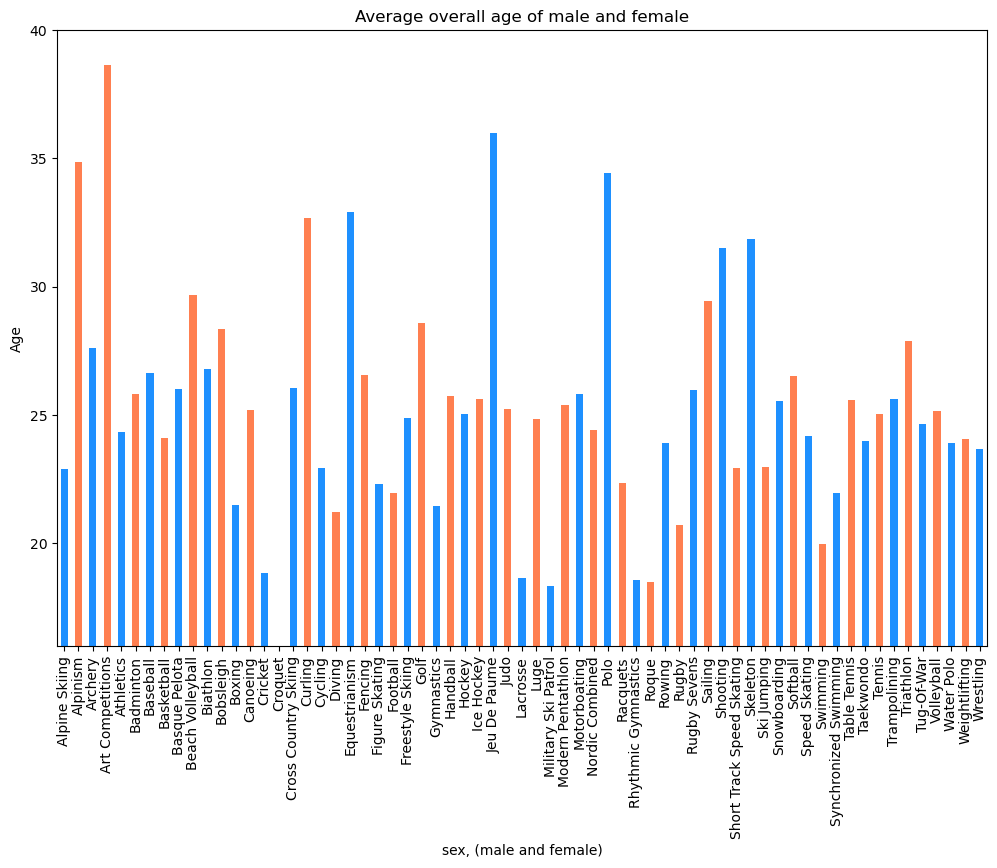

In [10]:
#Average age per sport
Average_age_sport=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Sport']).mean()
Average_sex_df=pd.DataFrame({"Age per sport":Average_age_sport})
Average_sex_df.head(10)



ge_sex_mean=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Sex']).mean()
plt.figure(figsize=(12, 8))
bar_colors=['dodgerblue','coral']
plot_pandas = Average_age_sport.plot.bar(color=bar_colors)
plt.xlabel("sex, (male and female)")
plt.ylim(16,40)
plt.ylabel("Age")
plt.title("Average overall age of male and female")
plt.savefig("Sport")

Sex
F    23.657286
M    24.988396
Name: Age, dtype: float64


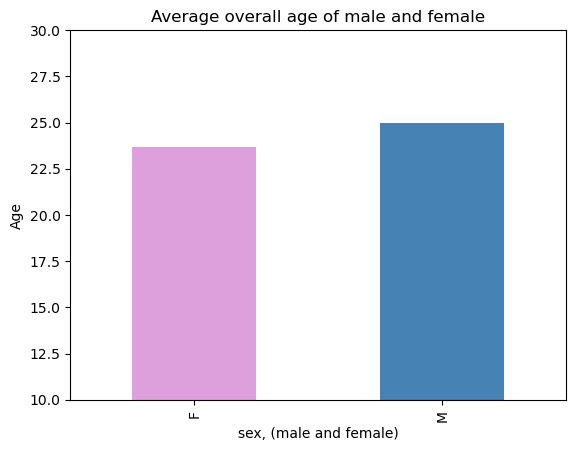

In [11]:
#Average age per sex 

age_sex_mean=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Sex']).mean()
bar_colors=['plum','steelblue']
plot_pandas = age_sex_mean.plot.bar(color=bar_colors)
plt.xlabel("sex, (male and female)")
plt.ylim(10,30)
plt.ylabel("Age")
plt.title("Average overall age of male and female")
plt.savefig("M&F")
print(age_sex_mean)

In [12]:
# Male data set 
gender_data = olympic_data_df.groupby(["Sex"])
averageAgeSex= gender_data["Age"].mean()
male_data=new_duplicate_df[new_duplicate_df["Sex"]=="M"]
male_data.head()
oldest_Male=male_data.sort_values((["Age"]),ascending=True)
oldest_Male.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45665,23557,Alessandro Covre,M,0.0,0.0,0.0,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",0
60291,30877,Frantiek Duek,M,0.0,0.0,0.0,Bohemia,BOH,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's Sabre, Individual",0
19442,10287,J. Brard,M,0.0,0.0,0.0,France,FRA,1900 Summer,1900,Summer,Paris,Cycling,Cycling Men's Sprint,0
19443,10287,J. Brard,M,0.0,0.0,0.0,France,FRA,1900 Summer,1900,Summer,Paris,Cycling,Cycling Men's Points Race,0
5801,3266,Carlos Amado Kohli,M,0.0,0.0,0.0,Argentina,ARG,1948 Summer,1948,Summer,London,Rowing,Rowing Men's Coxed Eights,0


In [8]:
#Female Data set 
gender_data = olympic_data_df.groupby(["Sex"])
averageAgeSex= gender_data["Age"].mean()
female_data=new_duplicate_df[new_duplicate_df["Sex"]=="F"]


female_data1=(female_data["ID"].count())
Average_Female_sex = female_data.groupby('Year')['Age'].mean()

oldest_Female=female_data.sort_values((["Age"]),ascending=False)
oldest_Female.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
35445,18252,Anne Marie Carl-Nielsen (Brodersen-),F,73.0,0.0,0.0,Denmark,DEN,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",0
11013,6016,Winifred Marie Louise Austen (-Frick),F,72.0,0.0,0.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0
11011,6016,Winifred Marie Louise Austen (-Frick),F,72.0,0.0,0.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",0
11012,6016,Winifred Marie Louise Austen (-Frick),F,72.0,0.0,0.0,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0
35433,18252,Anne Marie Carl-Nielsen (Brodersen-),F,69.0,0.0,0.0,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",0


29.644444444444446
12.046153846153846


<Figure size 1300x800 with 0 Axes>

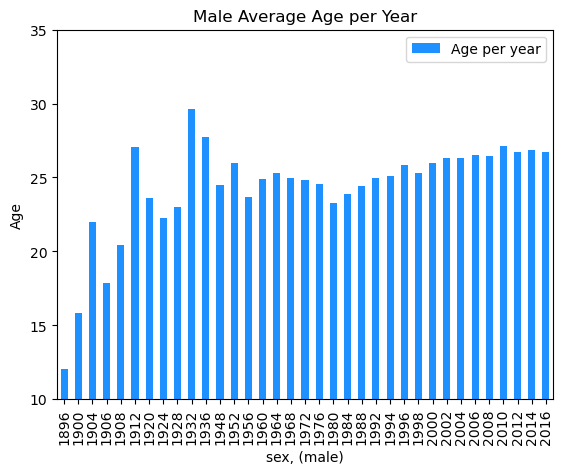

In [14]:

#Male Age over the years
Average_Male_sex=(male_data["Age"]).groupby(male_data['Year']).mean()
Average_age_yearm=(male_data["Age"]).groupby(male_data['Year']).mean()
Average_msex_df=pd.DataFrame({"Age per year":Average_age_yearm})
Average_sex_df.head(10)
ge_sex_mean=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Year']).mean()
plt.figure(figsize=(13, 8))
bar_colors=['dodgerblue','coral']
plot_pandas = Average_msex_df.plot.bar(color=bar_colors)
plt.xlabel("sex, (male)")
plt.ylim(10,35)
plt.ylabel("Age")
plt.title("Male Average Age per Year")
plt.savefig("MAge")
maxmale=max(Average_Male_sex)
minmale=min(Average_Male_sex)
print(maxmale)
print(minmale)

55.0
19.89423076923077


<Figure size 1200x800 with 0 Axes>

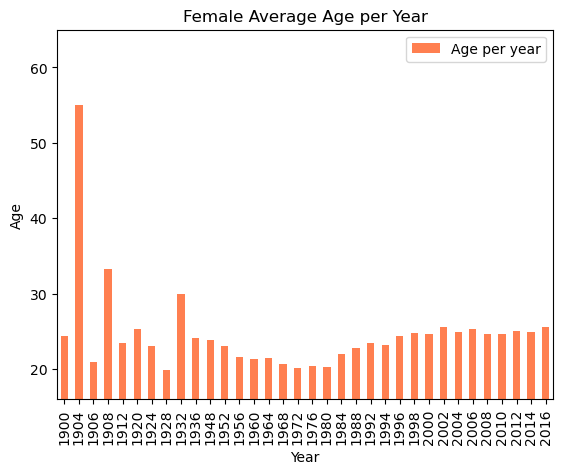

In [9]:
#female age over the years 
Average_Female_sex=(female_data["Age"]).groupby(female_data['Year']).mean()
Average_age_fe=(female_data["Age"]).groupby(female_data['Year']).mean()
Average_fsex_df=pd.DataFrame({"Age per year":Average_age_fe})

ge_sex_fem=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Year']).mean()
plt.figure(figsize=(12, 8))
plot_pandas = Average_fsex_df.plot.bar(color="coral")
plt.xlabel("Year")
plt.ylim(16,65)
plt.ylabel("Age")
plt.title("Female Average Age per Year")
maxfemale=max(Average_Female_sex)
minfemale=min(Average_Female_sex)
print(maxfemale)
print(minfemale)

plt.savefig("FAge")

29.675054704595187
12.046153846153846


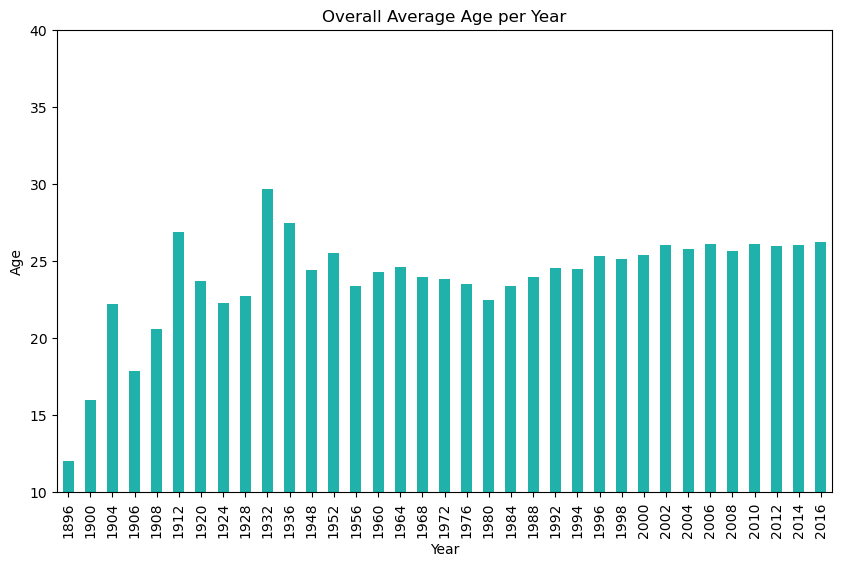

In [16]:
#overall average age
Average_Age_sex=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Year']).mean()
Average_age_all=(new_duplicate_df["Age"]).groupby(new_duplicate_df['Year']).mean()
Average_all_df=pd.DataFrame({"Age per year":Average_age_all})


plt.figure(figsize=(10, 6))
plot_pandas = Average_age_all.plot.bar(color="lightseagreen")
plt.xlabel("Year")
plt.ylim(10,40)
plt.ylabel("Age")
plt.title("Overall Average Age per Year")
maxall=max(Average_age_all)
minall=min(Average_age_all)
print(maxall)
print(minall)

#plt.savefig("allavg")